# ClusterAI 2020 - Ciencia de Datos - UTN BA 
# ML Strategy (Práctica, clase_08)

### Alumna: Tokashiki, Micaela F.
______

# Importamos librerías y sets (train y test)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Xy_train = pd.read_csv('Xy_train.csv')
Xy_train.head()

,X,y
0,2.273360,6.054685
1,3.167583,4.581428
2,7.973655,5.392507
3,6.762547,3.108068
4,3.911096,4.225744


In [3]:
# Separamos en X_train e y_train
X_train = Xy_train.iloc[:,0:1]
y_train = Xy_train.iloc[:,1::1]

In [4]:
X_test = pd.read_csv('X_test.csv')
X_test.shape

(20, 1)

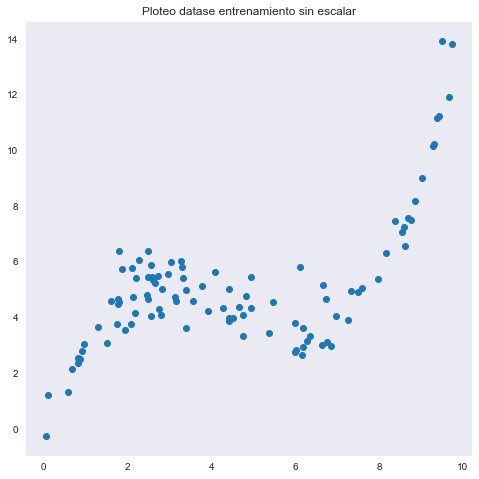

In [7]:
plt.figure(figsize = (8,8))
plt.scatter(X_train,y_train)
plt.title('Ploteo datase entrenamiento sin escalar')
sns.set_style('dark')
plt.show()

## Asignación:
Utilizando el training set provisto entrenar un modelo de regresión y predecir los valores para un nuevo set de inputs (test set)

#### Medida de evaluación:
MSE: Mean Squared Error

In [8]:
# Estandarizar set de entrenamiento
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

In [9]:
# Escalar luego de fitear
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [10]:
# Genero df para guardar y comparar resultados
rdos = pd.DataFrame(columns = ['Método','Y predicted'])

Por la gráfica obtenida anteriormente, se descarta rápidamente un modelo de regresión lineal (y por ende también Ridge)

# KNN Regression

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

est_knn = KNeighborsRegressor()

In [12]:
parameters_k = np.arange(1,50)
parameters_knn = [{'n_neighbors':parameters_k}]

gs_knn = GridSearchCV(est_knn,
                      param_grid=parameters_knn,
                      refit=True,
                      cv=5,
                      n_jobs=50,
                      scoring='neg_mean_squared_error')

In [13]:
gs_knn.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=50,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
             scoring='neg_mean_squared_error')

In [14]:
print(gs_knn.best_params_)
print(gs_knn.best_score_)

{'n_neighbors': 5}
-0.8703947992745912


In [15]:
pred_knn = gs_knn.best_estimator_.predict(x_test_scaled)
pred_knn_list = []

for item in pred_knn:
    pred_knn_list.append(float(item))

In [16]:
pred_knn_list = list(np.around(np.array(pred_knn_list),2))

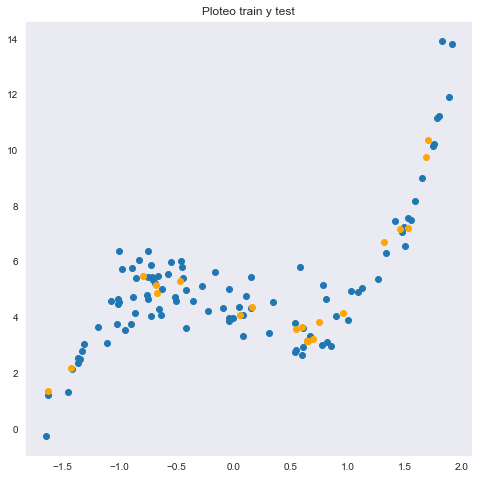

In [19]:
plt.figure(figsize = (8,8))
plt.scatter(x_train_scaled,y_train)
plt.scatter(x_test_scaled,pred_knn_list,color='orange')
plt.title('Ploteo train y test')
plt.show()

In [20]:
rdos = rdos.append({'Método':'KNN reg',
                    'Y predicted':pred_knn_list}, ignore_index=True)

# SVRegressor

In [21]:
from sklearn.svm import SVR

est_svr = SVR()
parameters_svr = [{'kernel':['rbf'],
                  'C':[0.001,0.1,0.5,1,2,5,10,50,100],
                   'gamma':[0.001,0.1,1,2,5,10,25]}]

In [22]:
gs_svr = GridSearchCV(est_svr,
                     param_grid=parameters_svr,
                     refit=True,
                     cv=5,
                     n_jobs=50,
                     scoring='neg_mean_squared_error')

In [23]:
gs_svr.fit(x_train_scaled,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=50,
             param_grid=[{'C': [0.001, 0.1, 0.5, 1, 2, 5, 10, 50, 100],
                          'gamma': [0.001, 0.1, 1, 2, 5, 10, 25],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [24]:
print(gs_svr.best_params_)
print(gs_svr.best_score_)

{'C': 100, 'gamma': 2, 'kernel': 'rbf'}
-0.6234700915526765


In [25]:
# Repito el gridsearch CV, con valores más cercanos a los mejores, igualmente se observa mejor score (en train..)

parameters_svr2 = [{'kernel':['rbf'],
                  'C':[50,75,85,95,100,105,110,115,120,150],
                   'gamma':[0.1,1,1.5,1.7,1.9,2,2.5,3,3.5]}]

In [26]:
gs_svr2 = GridSearchCV(est_svr,
                     param_grid=parameters_svr2,
                     refit=True,
                     cv=5,
                     n_jobs=50,
                     scoring='neg_mean_squared_error')

In [27]:
gs_svr2.fit(x_train_scaled,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=50,
             param_grid=[{'C': [50, 75, 85, 95, 100, 105, 110, 115, 120, 150],
                          'gamma': [0.1, 1, 1.5, 1.7, 1.9, 2, 2.5, 3, 3.5],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [28]:
print(gs_svr2.best_params_)
print(gs_svr2.best_score_)

{'C': 120, 'gamma': 1.5, 'kernel': 'rbf'}
-0.6069217285689257


In [29]:
pred_svr = gs_svr2.best_estimator_.predict(x_test_scaled)
pred_svr_list = []

for item in pred_svr:
    pred_svr_list.append(float(item))

In [30]:
pred_svr_list = list(np.around(np.array(pred_svr_list),2))

<function matplotlib.pyplot.show(*args, **kw)>

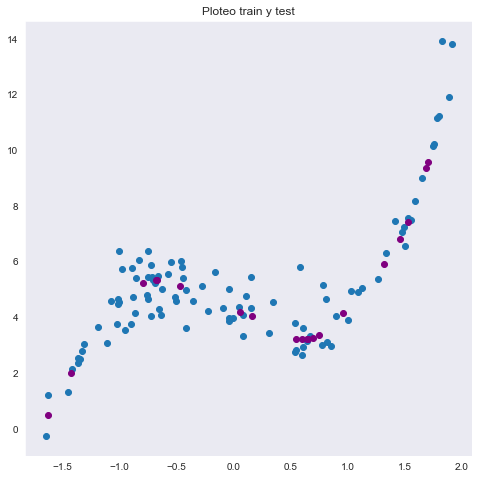

In [31]:
plt.figure(figsize = (8,8))
plt.scatter(x_train_scaled,y_train)
plt.scatter(x_test_scaled,pred_svr_list,color='purple')
plt.title('Ploteo train y test')
plt.show

In [32]:
rdos = rdos.append({'Método':'SVR',
                    'Y predicted':pred_svr_list}, ignore_index=True)

# Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

est_rand = RandomForestRegressor()

In [34]:
parameters_rand = {'n_estimators':[1,5,10,20,50,100]}

gs_rand = GridSearchCV(est_rand,
                       param_grid=parameters_rand,
                       refit=True,
                       cv=5,
                       n_jobs=50,
                       scoring='neg_mean_squared_error')

In [35]:
gs_rand.fit(x_train_scaled,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=50,
             param_grid={'n_estimators': [1, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [36]:
print(gs_rand.best_params_)
print(gs_rand.best_score_)

{'n_estimators': 10}
-0.9830790504253614


In [37]:
# Repito el gridsearch con parámetros cercanos al mejor

parameters_rand2 = {'n_estimators':[70,80,85,90,95,100,105,110,115,120,150]}

gs_rand2 = GridSearchCV(est_rand,
                        param_grid=parameters_rand2,
                        refit=True,
                        cv=5,
                        n_jobs=50,
                        scoring='neg_mean_squared_error') 

In [38]:
gs_rand2.fit(x_train_scaled,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=50,
             param_grid={'n_estimators': [70, 80, 85, 90, 95, 100, 105, 110,
                                          115, 120, 150]},
             scoring='neg_mean_squared_error')

In [39]:
print(gs_rand2.best_params_)
print(gs_rand2.best_score_)

{'n_estimators': 85}
-0.9978463228581124


In [40]:
pred_rand = gs_rand2.best_estimator_.predict(x_test_scaled)
pred_rand_list = []

for item in pred_rand:
    pred_rand_list.append(float(item))

In [41]:
pred_rand_list = list(np.around(np.array(pred_rand_list),2))

<function matplotlib.pyplot.show(*args, **kw)>

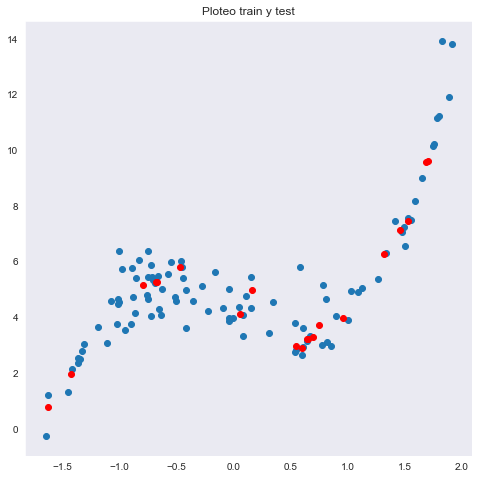

In [42]:
plt.figure(figsize = (8,8))
plt.scatter(x_train_scaled,y_train)
plt.scatter(x_test_scaled,pred_rand_list,color='red')
plt.title('Ploteo train y test')
plt.show

In [43]:
rdos = rdos.append({'Método':'Random Forest',
                    'Y predicted':pred_rand_list}, ignore_index=True)

### Selección del modelo más óptimo

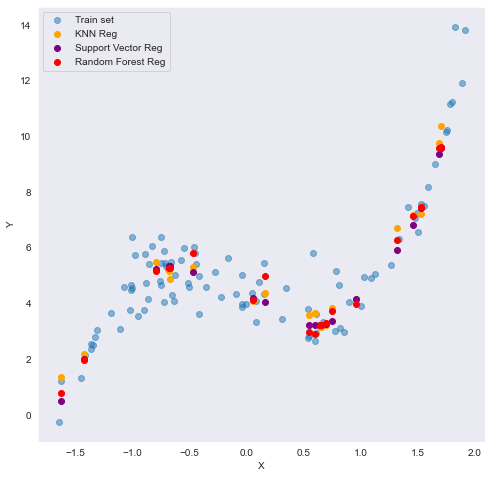

In [44]:
plt.figure(figsize = (8,8))
plt.scatter(x_train_scaled,y_train,label='Train set',alpha=0.5)
plt.scatter(x_test_scaled,pred_knn_list,color='orange',label='KNN Reg')
plt.scatter(x_test_scaled,pred_svr_list,color='purple',label='Support Vector Reg')
plt.scatter(x_test_scaled,pred_rand_list,color='red',label='Random Forest Reg')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

El modelo seleccionado es el <span class="mark">SVR</span> 

Con los siguientes hiper parámetros: 
- C: 120
- Gamma: 1.5
- Kernel: Gaussiano (rbf)

In [45]:
print(pred_svr_list)

[3.21, 3.22, 7.43, 5.25, 5.33, 3.35, 6.81, 0.5, 9.36, 5.33, 5.12, 3.26, 9.56, 2.0, 4.21, 5.92, 4.04, 3.24, 4.16, 3.21]
